<a href="https://colab.research.google.com/github/19PA1A0465/miniproject-final-evaluation/blob/main/model_with_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing all the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm 
import seaborn as sns#for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve# to calculate performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




# **Reading** **the** **data**

In [ ]:

dataset=pd.read_csv('feature data of all bands.csv')#read csv file

# **Data** **Inspection**

In [ ]:
# To see the first 5 rows of our dataset we use head() 
dataset.head()

,Mean,Kurtosis,Varience,Max_Svd,Entropy_Svd,Skewness,Target
0,0.000753,3.9757,0.0020,2.8817,43.5388,0.0135,0
1,-0.000102,4.4953,0.0017,2.6056,35.7801,0.0015,0
2,-0.000090,4.5453,0.0016,2.5671,35.2603,-0.0126,0
3,0.000496,4.4307,0.0017,2.6443,36.7637,-0.0053,0
4,-0.000377,3.1227,0.0030,3.4908,61.7647,-0.1275,0


In [ ]:
dataset.shape#to know the sh ape of datafeame

(1000, 7)

In [ ]:
#To know the columns names in dataset we use columns 
dataset.columns

Index(['Mean', 'Kurtosis', 'Varience', 'Max_Svd', 'Entropy_Svd', 'Skewness',
       'Target'],
      dtype='object')

In [ ]:
# To study the statastical summary of dataset we use discribe()
dataset.describe()

,Mean,Kurtosis,Varience,Max_Svd,Entropy_Svd,Skewness,Target
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.126154e-05,209.450938,0.001088,1.541447,13.079525,-0.466901,0.50000
std,5.601005e-04,236.171295,0.001609,1.423313,17.753771,6.532415,0.50025
min,-4.600000e-03,2.622300,0.000003,0.103900,0.086500,-27.773500,0.00000
25%,-2.088550e-05,11.082075,0.000023,0.304725,0.677400,-1.463050,0.00000
50%,-5.195000e-08,135.571500,0.000137,0.747400,2.313250,-0.002200,0.50000
75%,2.035425e-05,290.646875,0.001700,2.655000,19.998300,0.982925,1.00000
max,4.000000e-03,963.478400,0.007900,5.672700,103.372600,27.463400,1.00000


# **About** **the** **distribution**

In [ ]:
#To check Whether NA's (missingvalues) present in dataset
dataset.isnull().sum()

Mean           0
Kurtosis       0
Varience       0
Max_Svd        0
Entropy_Svd    0
Skewness       0
Target         0
dtype: int64

In [ ]:
#grouping data based on outcomes
print(dataset.groupby("Target").size())

Target
0    500
1    500
dtype: int64


# **Data** **visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


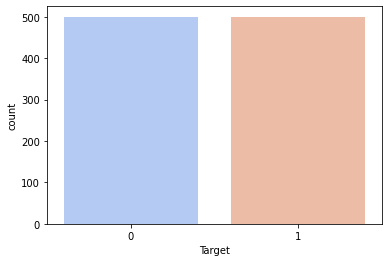

In [ ]:
sns.countplot(dataset['Target'],label="Count",palette="coolwarm")# visualizing the count of each element  in outcome column

# **Splitting data**

In [ ]:
X,y=dataset.loc[:,['Mean', 'Kurtosis', 'Varience', 'Max_Svd', 'Entropy_Svd', 'Skewness']], dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)# splittinh the dataframe into train and test data

In [ ]:
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(800, 4)
(200, 4)
(800,)
(200,)


In [ ]:
clf = svm.SVC(kernel='poly',degree=2) 
#declaring a variable to svm model


In [ ]:
clf.fit(X_train,y_train)#fitting data set into svm model



SVC(degree=2, kernel='poly')

In [ ]:
y_pred = clf.predict(X_test)#predicting results using our model
y_pred.shape


(200,)

In [ ]:
def report(model): #Function to calculate classification report,confusion matrix & roc curve
    preds = model.predict(X_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)

SVM Classifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.48      0.65       200

    accuracy                           0.48       200
   macro avg       0.50      0.24      0.33       200
weighted avg       1.00      0.48      0.65       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

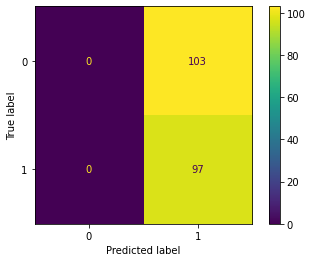

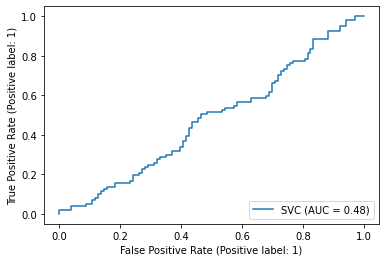

In [ ]:
print("SVM Classifier")
report(clf)

In [ ]:
#fittting the training set into model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        89
           1       0.71      0.62      0.66       111

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.66      0.65      0.65       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


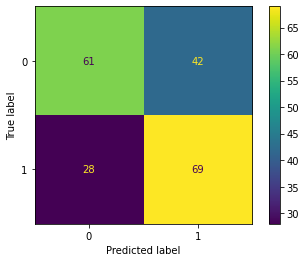

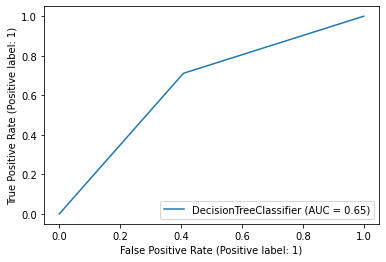

In [ ]:
print("Decision Tree Classifier")
report(tree)

In [ ]:
#fitting our nodel with training sets
ran=RandomForestClassifier(n_estimators=100)
ran.fit(X_train,y_train)

RandomForestClassifier()

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        88
           1       0.74      0.64      0.69       112

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.68       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


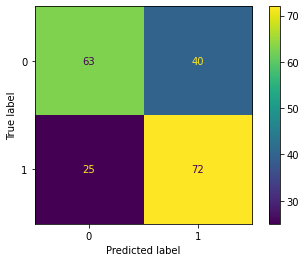

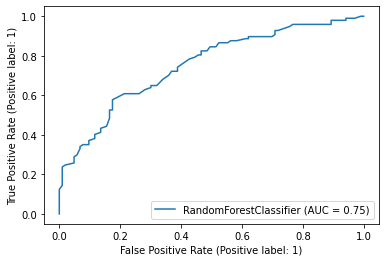

In [ ]:
print("Random Forest Classifier")
report(ran)

In [ ]:
#now building  adaboostclassifier on training sets and fitting 
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

Adaboost
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        92
           1       0.63      0.56      0.60       108

    accuracy                           0.58       200
   macro avg       0.59      0.59      0.58       200
weighted avg       0.59      0.58      0.59       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


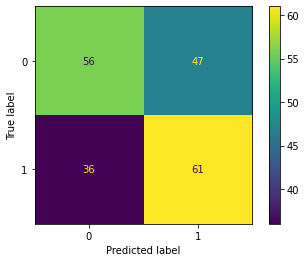

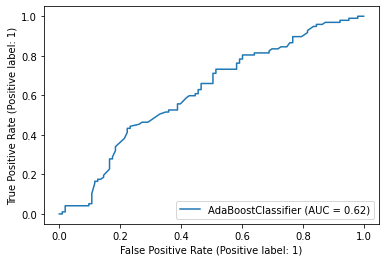

In [ ]:
print("Adaboost")
report(classifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=50)

KNN
              precision    recall  f1-score   support

           0       0.46      0.59      0.51        80
           1       0.66      0.53      0.59       120

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.58      0.56      0.56       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


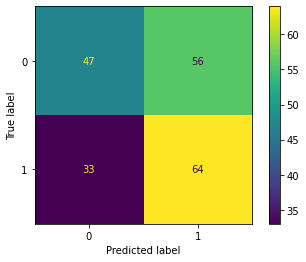

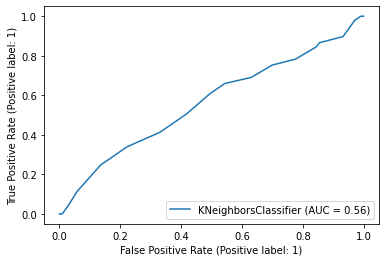

In [ ]:
print("KNN")
knc.fit(X_train,y_train)
report(knc)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       136
           1       0.29      0.44      0.35        64

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.45       200
weighted avg       0.53      0.47      0.49       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


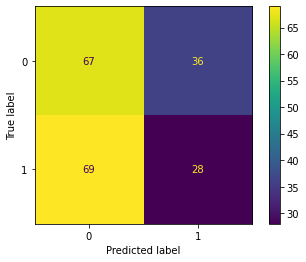

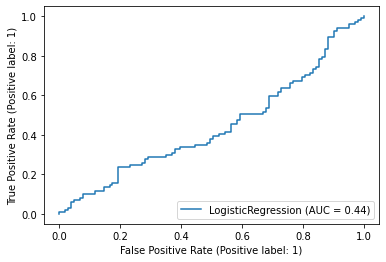

In [ ]:
print("Logistic Regression")
report(lrc)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50)
bc.fit(X_train,y_train)

BaggingClassifier(n_estimators=50)

bagging
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        91
           1       0.75      0.67      0.71       109

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


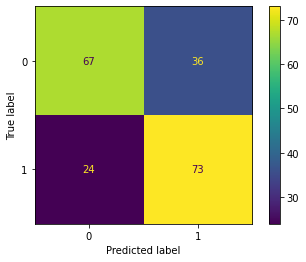

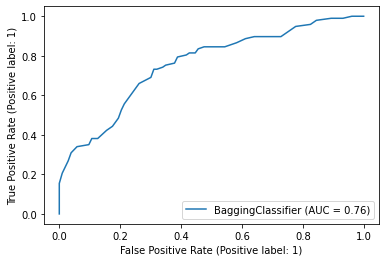

In [ ]:
print("bagging")
report(bc)